<a href="https://colab.research.google.com/github/julianovale/BB_Evolution/blob/main/0009_AluraBB_ML_Intro_ClassificacaoSKLearn_Projeto03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# importações
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
renomear = {
    "expected_hours" : "horas_esperadas",
    "price" : "preco",
    "unfinished" : "nao_finalizado"
}

dados = dados.rename(columns=renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
# melhor transformar o "Não Finalizado" em "Finalizado"
troca = {
    0 : 1,
    1 : 0
}

dados["finalizado"] = dados.nao_finalizado.map(troca)
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


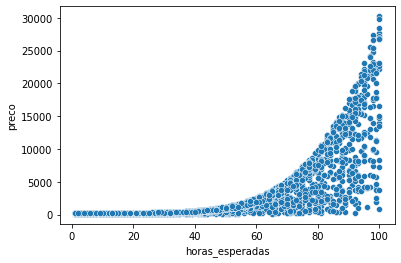

In [5]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

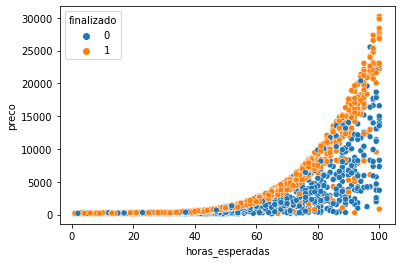

In [6]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados);

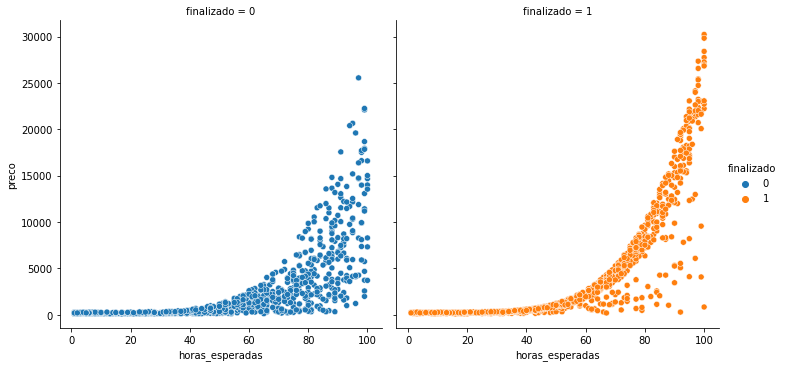

In [7]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados);

In [8]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [10]:
# Modelo completo com split automatizado

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

print("Treinaremos com %d amostras e testaremos com %d amostras" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
print("Acurácia = %.2f%%" % (accuracy_score(teste_y, previsoes)*100)) 

Treinaremos com 1617 amostras e testaremos com 540 amostras
Acurácia = 47.41%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
previsoes_de_base = np.ones(540)

In [12]:
print("Acurácia do algoritmo de baseline = %.2f%%" % (accuracy_score(teste_y, previsoes_de_base)*100)) 

Acurácia do algoritmo de baseline = 52.59%


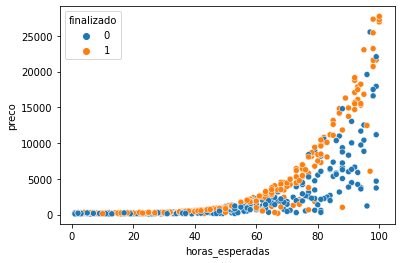

In [13]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x);

In [14]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [15]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [16]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [17]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

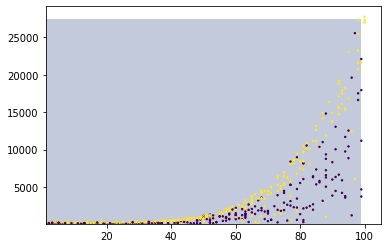

In [18]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=2)

# decision boundary

Usando uma reta, não deu muito certo... e aí?

# Modelo não linear

In [24]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

print("Treinaremos com %d amostras e testaremos com %d amostras" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
print("Acurácia = %.2f%%" % (accuracy_score(teste_y, previsoes)*100)) 

Treinaremos com 1617 amostras e testaremos com 540 amostras
Acurácia = 53.15%


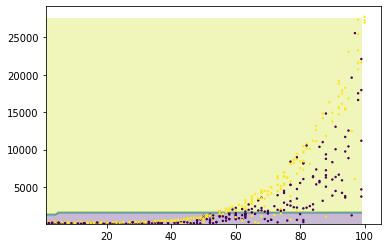

In [25]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=2)

Ainda não deu certo... o que preciso fazer????

# Reescalando... Quem sabe?!

In [30]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

print("Treinaremos com %d amostras e testaremos com %d amostras" % (len(raw_treino_x), len(raw_teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
print("Acurácia = %.2f%%" % (accuracy_score(teste_y, previsoes)*100)) 

Treinaremos com 1617 amostras e testaremos com 540 amostras
Acurácia = 70.37%


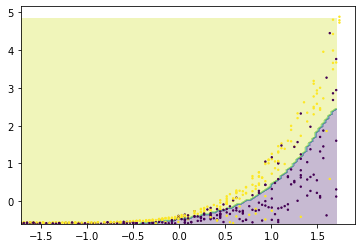

In [34]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=2)